In [ ]:
!pip install mlxtend

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

#Import data
df = pd.read_csv('/content/drive/MyDrive/Prod_Rec.csv',encoding = 'utf8')
df.head(5)

Timestamp โปรแกรมแท้  ... กระบองเพชรพูดได้    ROV Skin
0  10/28/2021 14:05        NaN  ...       ไม่เคยซื้อ  ไม่เคยซื้อ
1  10/28/2021 14:06        NaN  ...       ไม่เคยซื้อ     เคยซื้อ
2  10/28/2021 14:06        NaN  ...       ไม่เคยซื้อ  ไม่เคยซื้อ
3  10/28/2021 14:06        NaN  ...       ไม่เคยซื้อ  ไม่เคยซื้อ
4  10/28/2021 14:06        NaN  ...       ไม่เคยซื้อ  ไม่เคยซื้อ

[5 rows x 28 columns]

In [ ]:
missing = df.isnull().sum()
print(missing)

Timestamp                                  0
โปรแกรมแท้                                14
เครื่องซักผ้า                             14
NONE                                      12
รองเท้าวิ่ง                                0
ผักกรอบ                                    0
คอร์สเรียนเสริม                            0
nintendo switch                            0
BTC (Bitcoin)                              0
mechanical keyboard                        0
เครื่องดูดฝุ่น Dyson                       0
เคส ipad                                   0
คุณเคยซื้อโต๊ะปรับระดับหรือไม่             0
สินค้าจากพิมรี่พาย                         0
I PHONE 13                                 0
หูฟัง bluetooth (airpods,truewireless)     0
แก้วน้ำ Starbucks                          0
เบาะรองนั่ง                                0
เครื่องชงกาแฟแคปซูล                        0
ตั๋วเครื่องบินไปญี่ปุ่น                    0
Ebook                                      0
ตู้เย็น                                    0
กล้องฟิล์ม

In [ ]:
def int_convert(x):
    if x == 'ไม่เคยซื้อ':
        return 0
    if x == 'เคยซื้อ':
        return 1
df = df.applymap(int_convert)

In [ ]:
df.drop('เครื่องซักผ้า', inplace=True, axis=1)

In [ ]:
df.drop('โปรแกรมแท้', inplace=True, axis=1)

In [ ]:
df.drop('NONE', inplace=True, axis=1)

KeyError: ignored

In [ ]:
df.drop('ตู้เย็น', inplace=True, axis=1)

In [ ]:
df.drop('Timestamp', inplace=True, axis=1)

KeyError: ignored

In [ ]:
df.head()

รองเท้าวิ่ง  ผักกรอบ  ...  กระบองเพชรพูดได้  ROV Skin
0            1        1  ...                 0         0
1            1        0  ...                 0         1
2            1        0  ...                 0         0
3            1        0  ...                 0         0
4            1        1  ...                 0         0

[5 rows x 23 columns]

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         926 non-null    object 
 1   consequents         926 non-null    object 
 2   antecedent support  926 non-null    float64
 3   consequent support  926 non-null    float64
 4   support             926 non-null    float64
 5   confidence          926 non-null    float64
 6   lift                926 non-null    float64
 7   leverage            926 non-null    float64
 8   conviction          926 non-null    float64
dtypes: float64(7), object(2)
memory usage: 65.2+ KB


In [ ]:
rules.head()

antecedents  ... conviction
0                                 (ผักกรอบ)  ...        inf
1                             (รองเท้าวิ่ง)  ...   1.019157
2                           (BTC (Bitcoin))  ...        inf
3                             (รองเท้าวิ่ง)  ...   1.029885
4  (หูฟัง bluetooth (airpods,truewireless))  ...        inf

[5 rows x 9 columns]

In [ ]:
rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.5) ]

antecedents  ... conviction
0                                          (ผักกรอบ)  ...        inf
2                                    (BTC (Bitcoin))  ...        inf
4           (หูฟัง bluetooth (airpods,truewireless))  ...        inf
5                                      (รองเท้าวิ่ง)  ...   1.126437
6                                            (Ebook)  ...        inf
..                                               ...  ...        ...
911                   (เบาะรองนั่ง, คอร์สเรียนเสริม)  ...   1.261084
913  (Ebook, หูฟัง bluetooth (airpods,truewireless))  ...   1.568966
916                                (Ebook, เคส ipad)  ...   1.172414
920                         (Ebook, คอร์สเรียนเสริม)  ...   1.172414
921                                    (เบาะรองนั่ง)  ...   1.339901

[725 rows x 9 columns]

In [ ]:
rules_Top10 = rules.sort_values(["lift"], ascending = (False))

In [ ]:
rules_Top10.head(10)

antecedents  ... conviction
805    (Ebook, หูฟัง bluetooth (airpods,truewireless))  ...   1.905172
797  (Ebook, หูฟัง bluetooth (airpods,truewireless)...  ...   1.905172
572                          (BTC (Bitcoin), เคส ipad)  ...   2.206897
792             (BTC (Bitcoin), เคส ipad, รองเท้าวิ่ง)  ...   2.206897
569    (Ebook, หูฟัง bluetooth (airpods,truewireless))  ...   1.905172
800                          (BTC (Bitcoin), เคส ipad)  ...   2.206897
198                                    (BTC (Bitcoin))  ...   1.793103
395    (Ebook, หูฟัง bluetooth (airpods,truewireless))  ...   1.793103
195    (Ebook, หูฟัง bluetooth (airpods,truewireless))  ...   1.793103
398                       (BTC (Bitcoin), รองเท้าวิ่ง)  ...   1.793103

[10 rows x 9 columns]

In [ ]:
rules_Top10[rules_Top10['consequents'].str.len()==1].head(10)

antecedents  ... conviction
195    (Ebook, หูฟัง bluetooth (airpods,truewireless))  ...   1.793103
392  (Ebook, หูฟัง bluetooth (airpods,truewireless)...  ...   1.793103
788  (Ebook, หูฟัง bluetooth (airpods,truewireless)...  ...   1.793103
566  (Ebook, หูฟัง bluetooth (airpods,truewireless)...  ...   1.793103
843  (Ebook, หูฟัง bluetooth (airpods,truewireless)...  ...   1.793103
872  (หูฟัง bluetooth (airpods,truewireless), เคส i...  ...   1.793103
761  (Ebook, คอร์สเรียนเสริม, หูฟัง bluetooth (airp...  ...   1.793103
554  (Ebook, หูฟัง bluetooth (airpods,truewireless)...  ...   1.793103
365  (หูฟัง bluetooth (airpods,truewireless), เคส i...  ...   1.379310
184  (หูฟัง bluetooth (airpods,truewireless), เคส i...  ...   1.379310

[10 rows x 9 columns]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3612 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3633 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3585 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3610 missing from current font.
  font.set_text(s

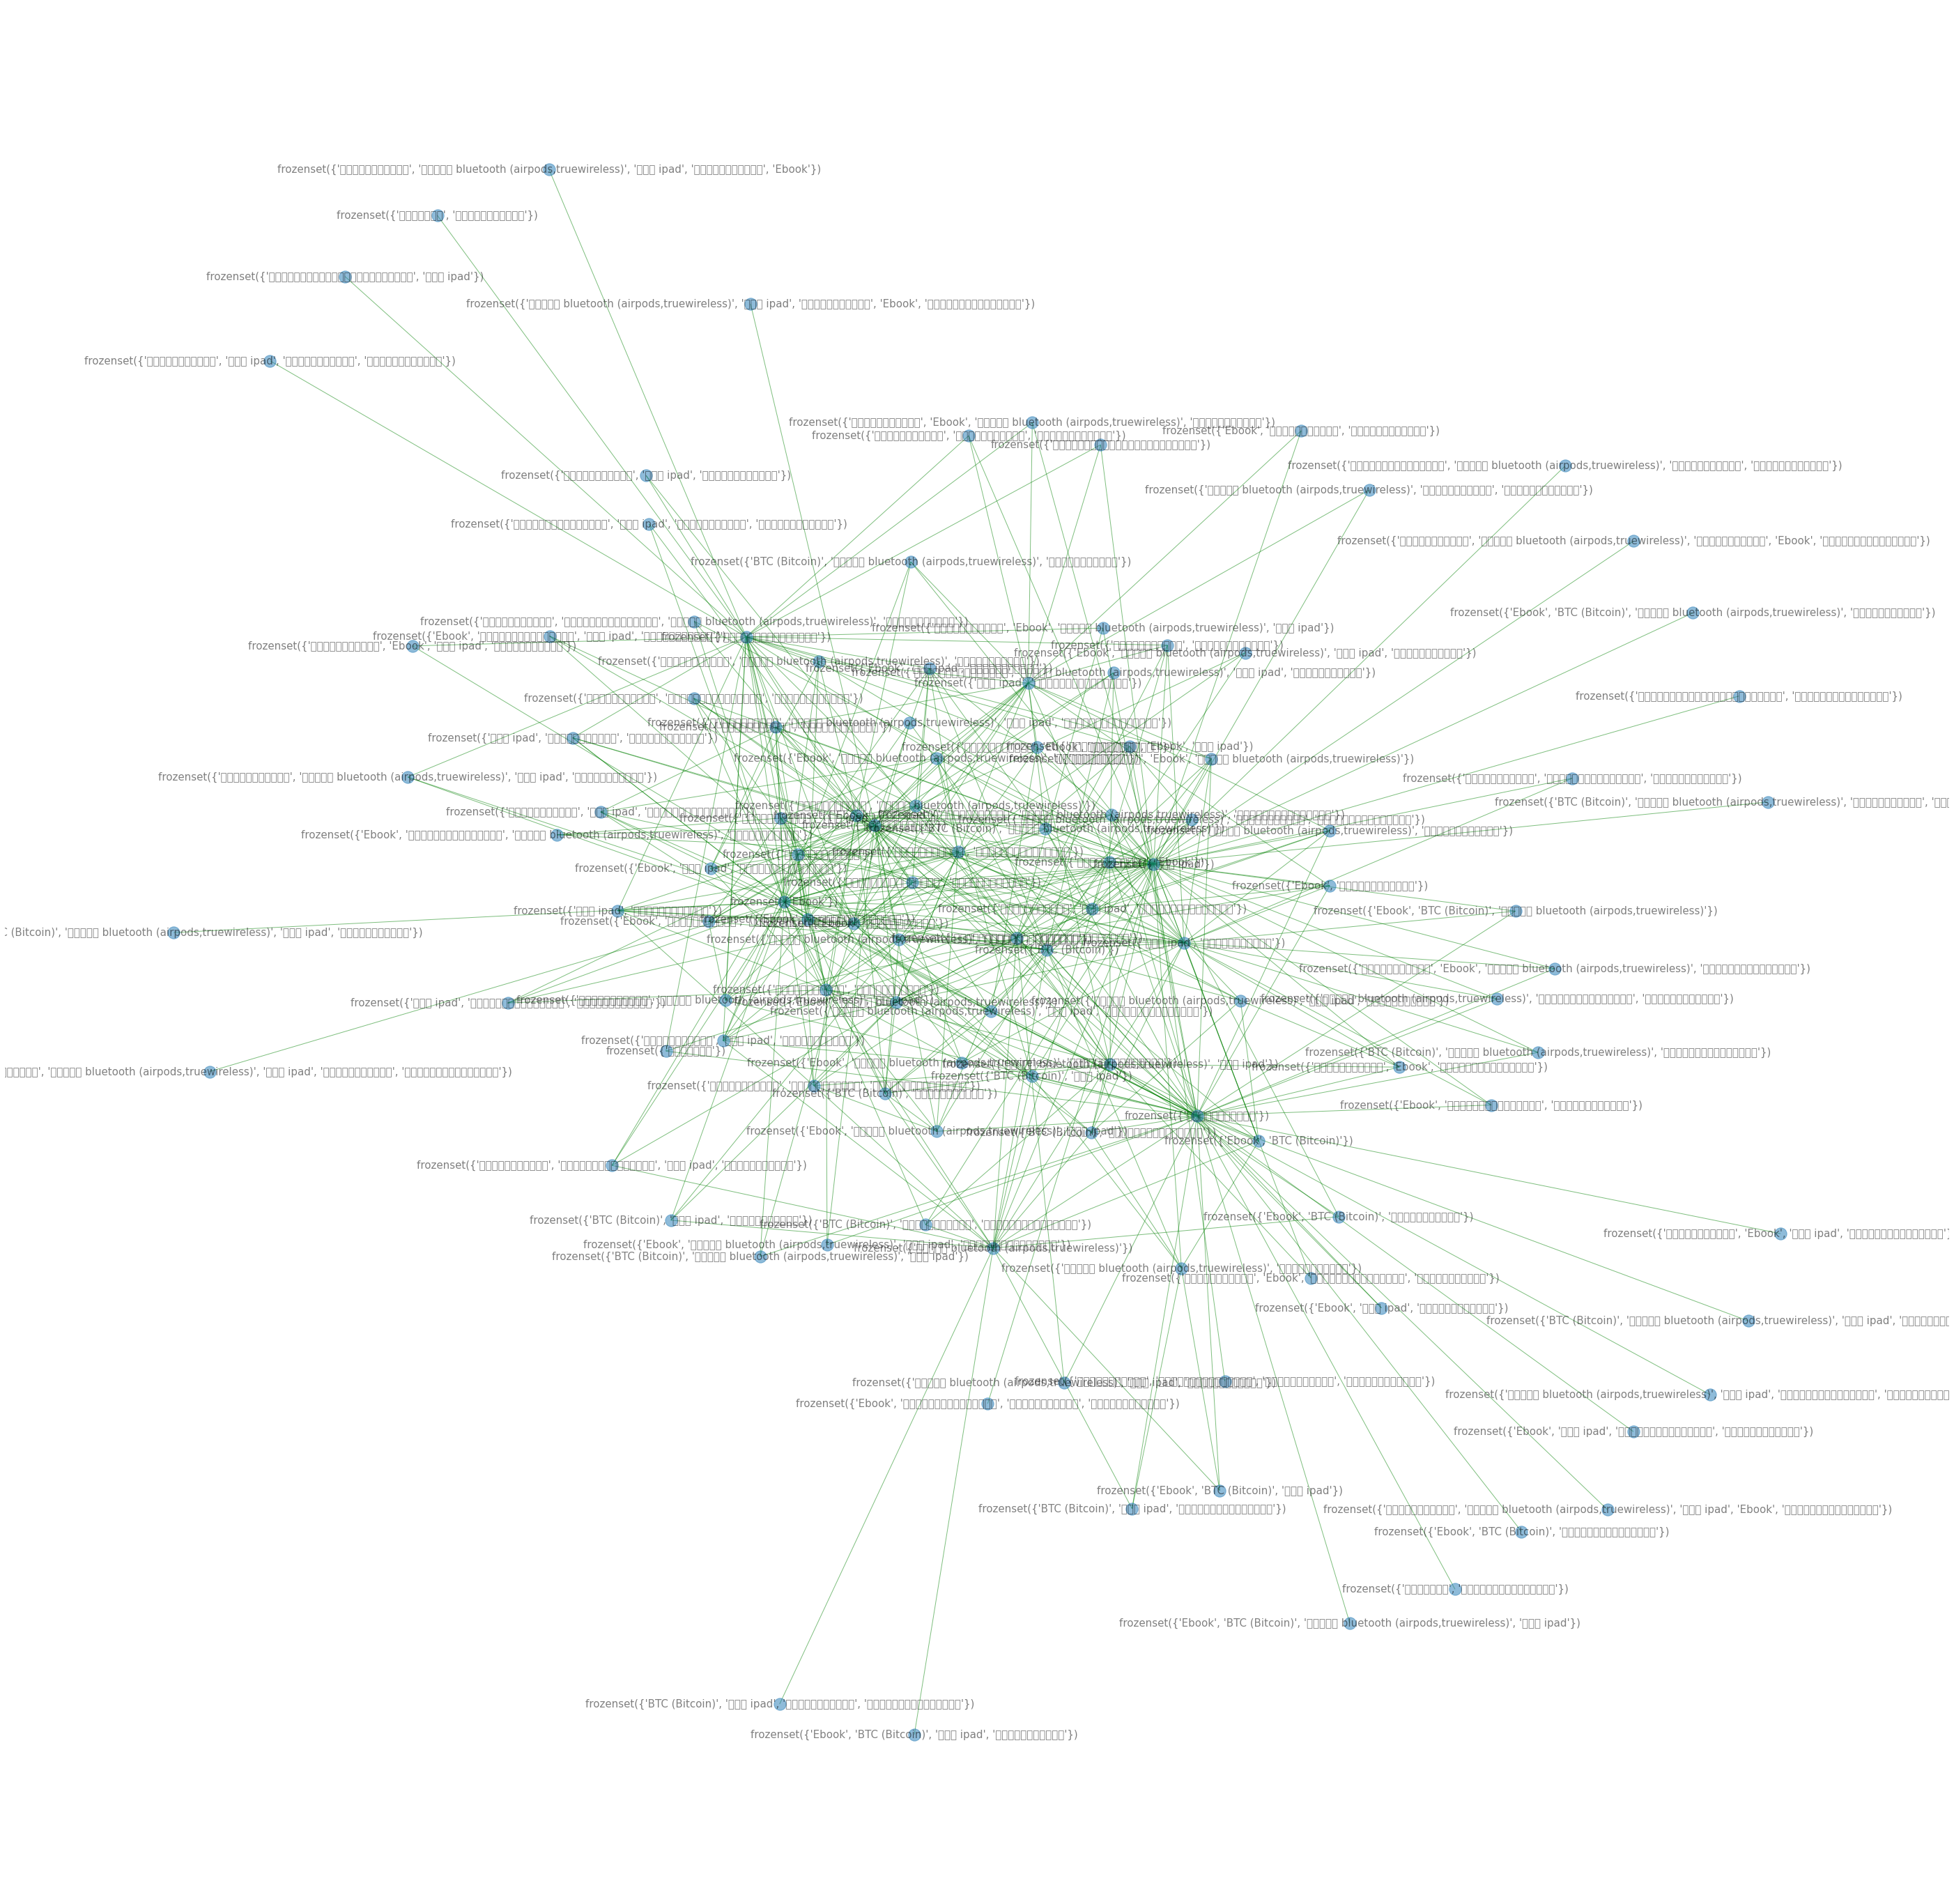

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

fig, ax=plt.subplots(figsize=(50,50))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True,alpha = 0.5,node_size = 300,font_size=15,edge_color='g')
plt.show()

In [ ]:
item_item_matrix = pd.DataFrame(index=df.columns,columns=df.columns)

In [ ]:
from scipy.spatial.distance import cosine

for i in range(0,len(item_item_matrix.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix.columns)) :
      # Fill in placeholder with cosine similarities
      item_item_matrix.iloc[i,j] = 1 -cosine(df.iloc[:,i],df.iloc[:,j])

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [ ]:
links = item_item_matrix.rename_axis('related item', 
                                     axis='columns').stack().reset_index()
links.columns = ['item', 'related item','value']

In [ ]:
links_filtered=links.loc[ (links['value'] > 0.1) & 
                         (links['item'] != links['related item']) ]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3607 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3657 missing from current font.
  font.set_text(s

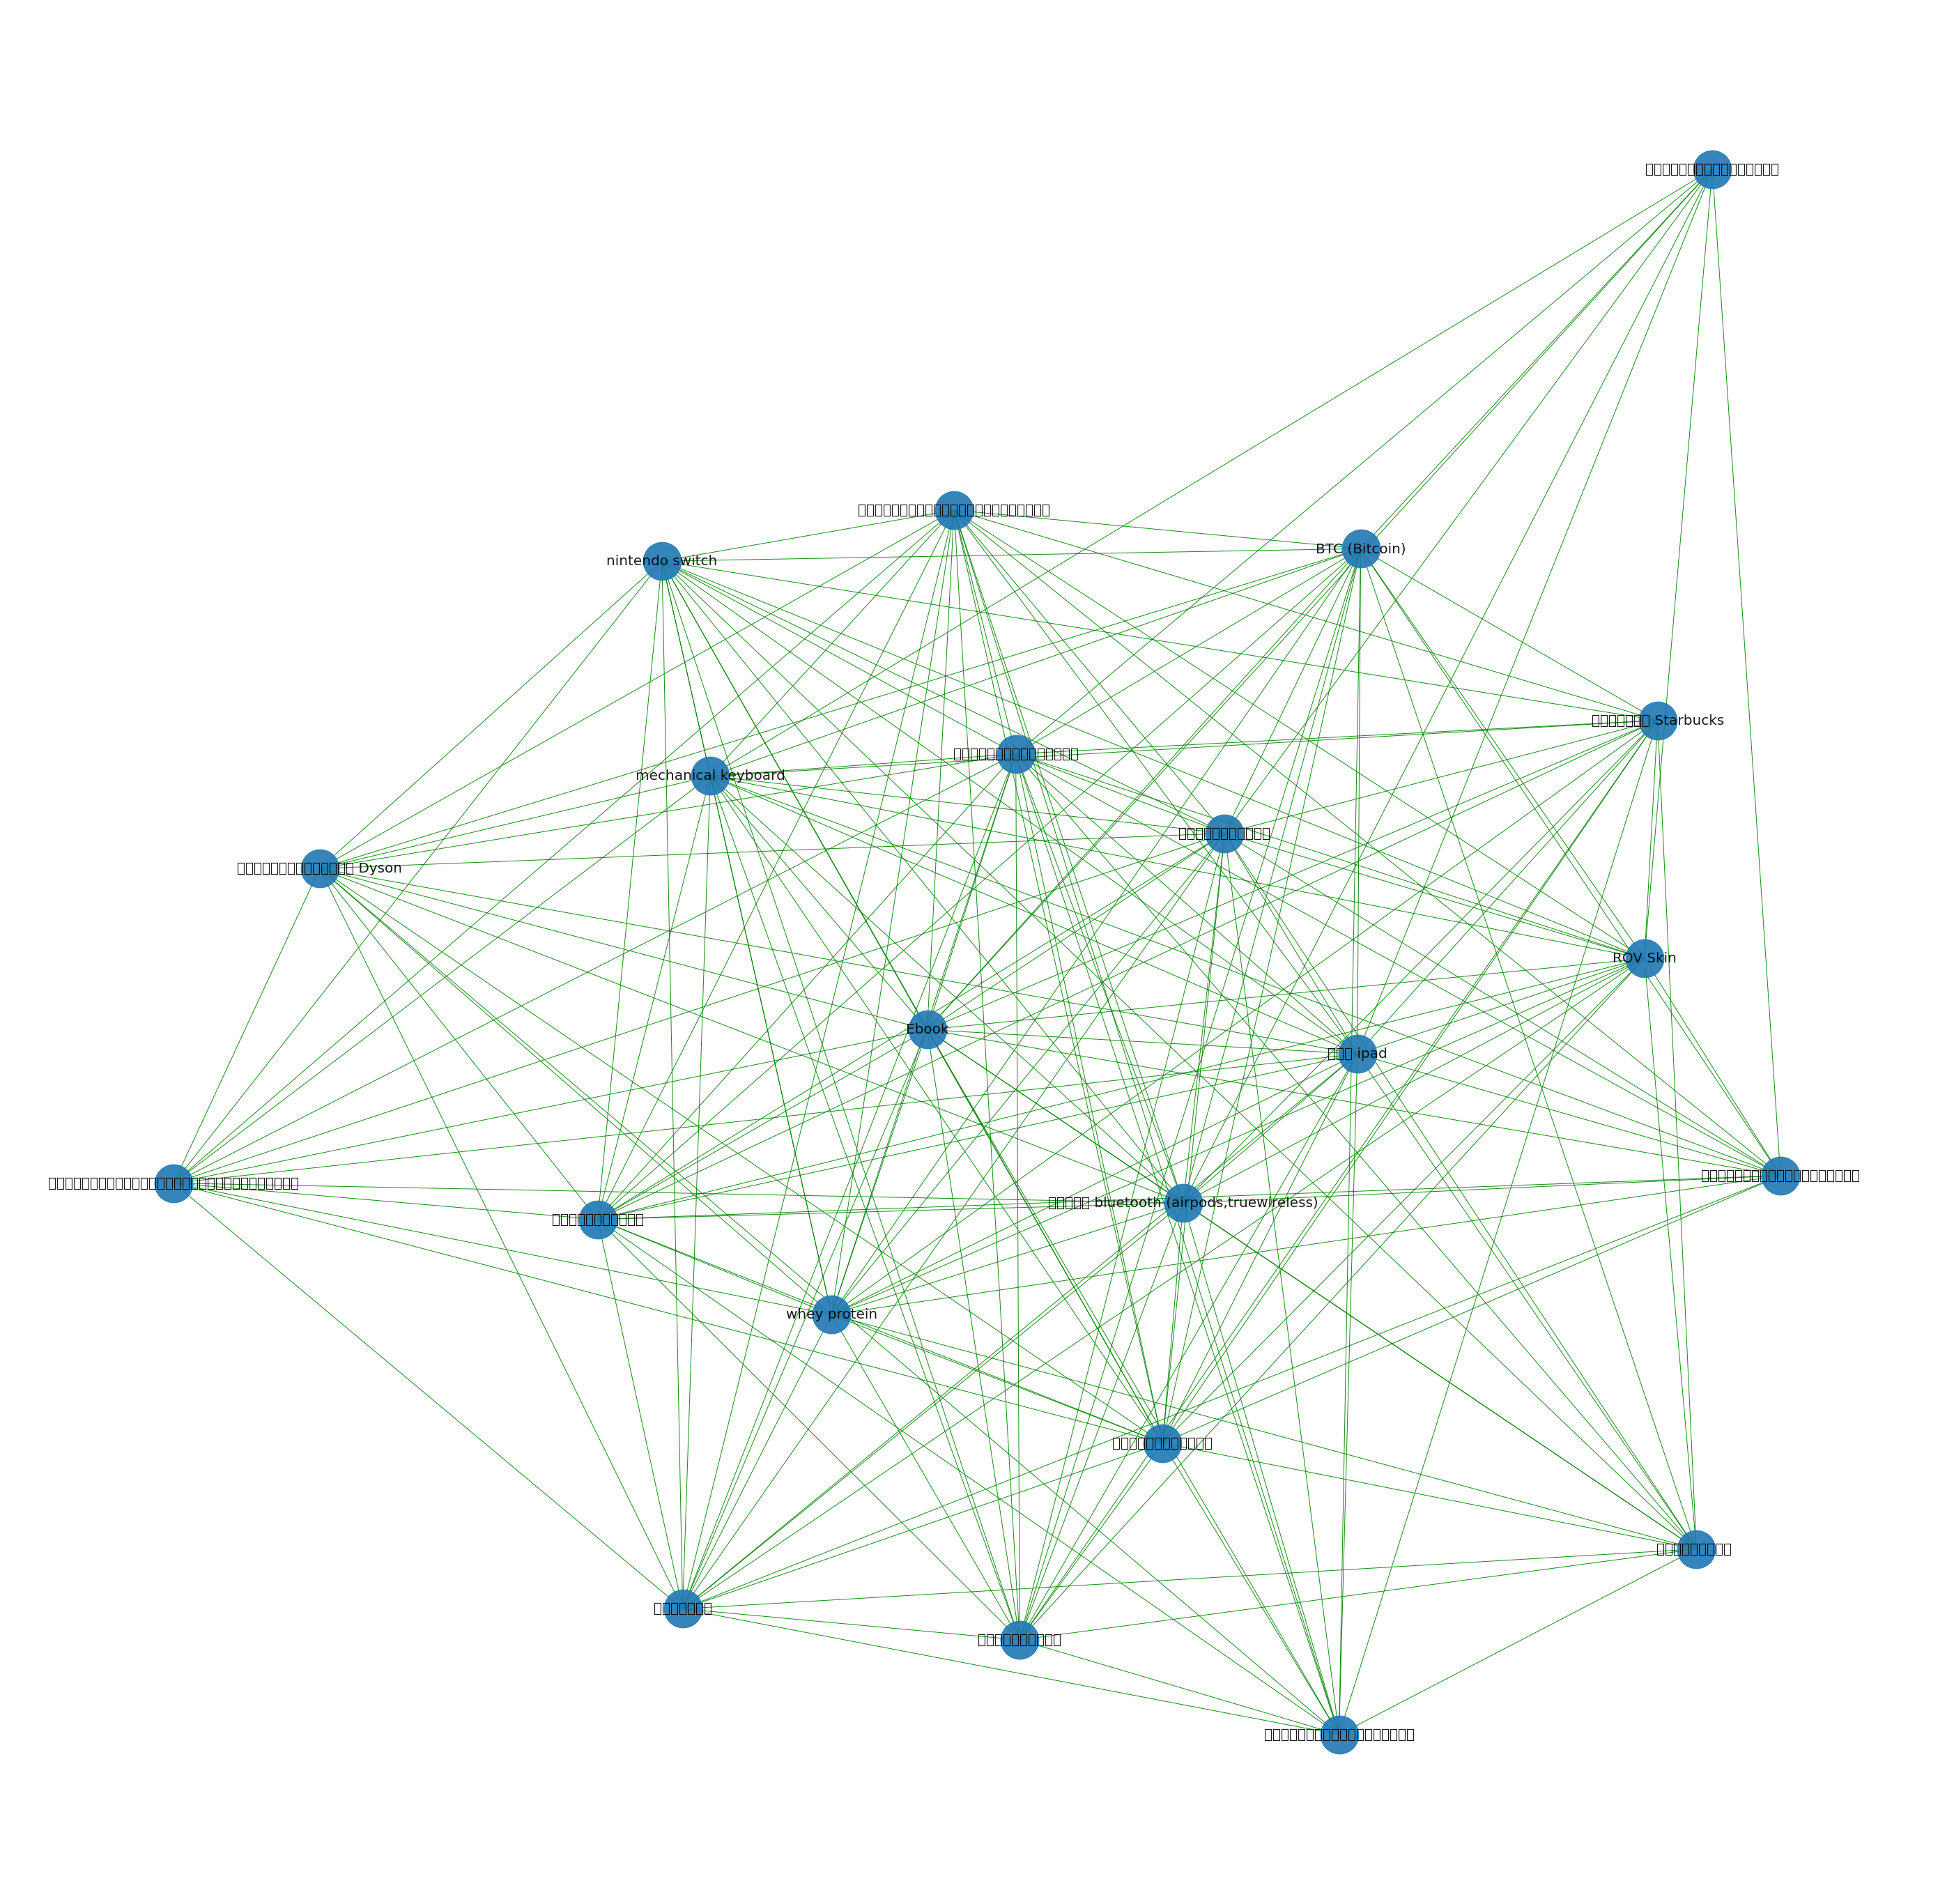

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(50,50))
GA=nx.from_pandas_edgelist(links_filtered,source='item',target='related item')
nx.draw(GA,with_labels=True,alpha = 0.9,node_size = 3000,font_size=20,edge_color='g')
plt.show()

<BarContainer object of 23 artists>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3607 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3657 missing from current font.
  font.set_text(s

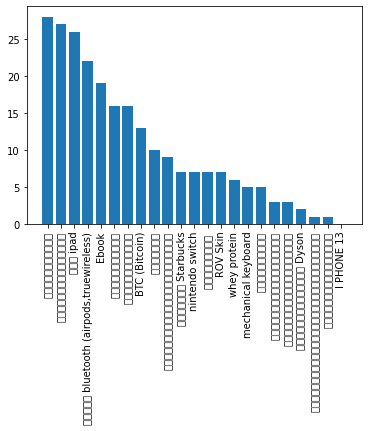

In [ ]:
df2 = df.T
df2['count'] = df2.sum(axis=1)
df_sorted = df2.sort_values('count',ascending = False)

plt.xticks(rotation=90)
plt.bar(df_sorted.index,df_sorted['count'],align='center')